<a href="https://colab.research.google.com/github/uss111kr/Logistic-Regression/blob/main/Uma_Shankar_Singh_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Logistic Regression - Binary Classification

The "sigmoid" function is a continuous function matching this characteristic.

$$y = \cfrac{1}{1+e^{-(w\cdot x + b)}}$$

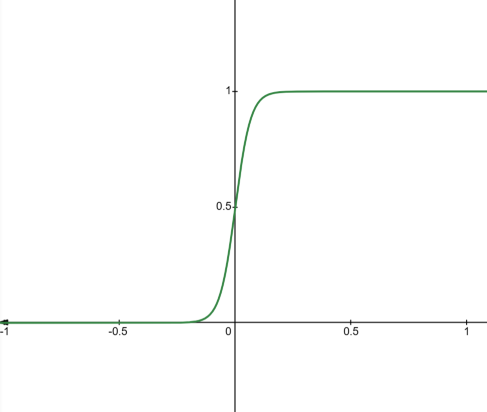

Transforming to "linear equation":

$$\ln \left( \cfrac{y}{1-y} \right) = w\cdot x + b$$

The left hand side of the equation is called "logit" (logistic unit) for "probability" $y$.


In [ ]:
!pip install scikit-learn

### Predicting liquefaction of soil due to earthquakes


[Soil Liquefaction](https://en.wikipedia.org/wiki/Soil_liquefaction) occurs when soil usually behaving like a "solid" acts like a "liquid", due to sudden change in stress conditions. Earthquakes are primary causes of liquefaction. In this notebook, we train a logistic regression model to predict if the soil will liquefy or not for a given set of conditions (earthquake parameters and soil characteristics).

_Data from: Jilei Hu, Jing Wang, Wenjun Zou, Bing Yang,
Datasets for gravelly soil liquefaction case histories,
Data in Brief,
Volume 36,
2021,
107104,
ISSN 2352-3409,
https://doi.org/10.1016/j.dib.2021.107104.
(https://www.sciencedirect.com/science/article/pii/S2352340921003887)_


### Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# reading the data
xls_path = '/content/drive/MyDrive/Python/soil-liquefaction.xlsx'
soil_df = pd.read_excel(xls_path)

# display(soil_df.columns)

# renaming columns
soil_df.rename(columns = {
  'Mw': 'moment_magnitude',
  'R (km)': 'epicentral_distance',
  't (s)': 'duration',
  'PGA': 'peak_ground_acceleration',
  'FC (%)': 'fines_content',
  'GC (%)': 'gravel_content',
  'D50 (mm)': 'median_grain_size',
  'N\'120': 'dpt_blow_count',
  'Vs1 (m/s)': 'shear_wave_velocity',
  'σ\'v (kPa)': 'effective_stress',
  'Dw (m)': 'depth_to_water_table',
  'Ds (m)': 'depth_to_soil_layer',
  'Hn (m)': 'thickness_of_capping_layer',
  'Dn (m)': 'capping_layer_to_ground_water',
  'rd': 'stress_reduction_coefficient',
  'CSR7.5': 'normalized_csr',
  'Liqefied ？': 'liquefied'
}, inplace = True)

# remove unnecessary columns
soil_df.drop(columns = [
  'Case No.',
  'Date',
  'Earthquake Name',
  'Site location & Borehole name',
  'MSF',
  'CSR',
  'Reference'
], inplace = True)

# convert the "liquefied" column to True and False
soil_df['liquefied'] = soil_df['liquefied'] == "Yes"


# preview the data frame
display(soil_df.head(5))

# info method shows non-null counts and data types for all columns
display(soil_df.info())

,moment_magnitude,epicentral_distance,duration,peak_ground_acceleration,fines_content,gravel_content,median_grain_size,dpt_blow_count,shear_wave_velocity,effective_stress,depth_to_water_table,depth_to_soil_layer,thickness_of_capping_layer,capping_layer_to_ground_water,stress_reduction_coefficient,normalized_csr,liquefied
0,6.4,22.0,3.5,0.47,13.0,21.0,1.2,14.595746,200.061382,25.0,0.2,2.5,1.20,0.0,0.973476,0.391179,True
1,6.4,22.0,3.5,0.20,15.0,35.0,2.0,10.988918,201.183548,87.6,2.7,7.0,0.07,0.0,0.889213,0.118419,True
2,6.4,22.0,3.5,0.47,NaN,NaN,NaN,11.151386,210.941954,16.5,0.2,1.5,1.00,0.0,0.988492,0.370167,True
3,6.4,22.0,3.5,0.47,NaN,NaN,NaN,18.208813,267.181268,30.6,0.2,3.0,1.00,0.0,0.965369,0.301011,True
4,6.8,15.5,10.0,0.20,19.0,47.0,4.0,7.401850,153.239466,19.9,0.2,1.9,0.40,0.0,0.986024,0.187582,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   moment_magnitude               234 non-null    float64
 1   epicentral_distance            225 non-null    float64
 2   duration                       229 non-null    float64
 3   peak_ground_acceleration       234 non-null    float64
 4   fines_content                  195 non-null    float64
 5   gravel_content                 208 non-null    float64
 6   median_grain_size              209 non-null    float64
 7   dpt_blow_count                 234 non-null    float64
 8   shear_wave_velocity            234 non-null    float64
 9   effective_stress               234 non-null    float64
 10  depth_to_water_table           234 non-null    float64
 11  depth_to_soil_layer            234 non-null    float64
 12  thickness_of_capping_layer     156 non-null    flo

None

### Correlation Analysis

<Axes: >

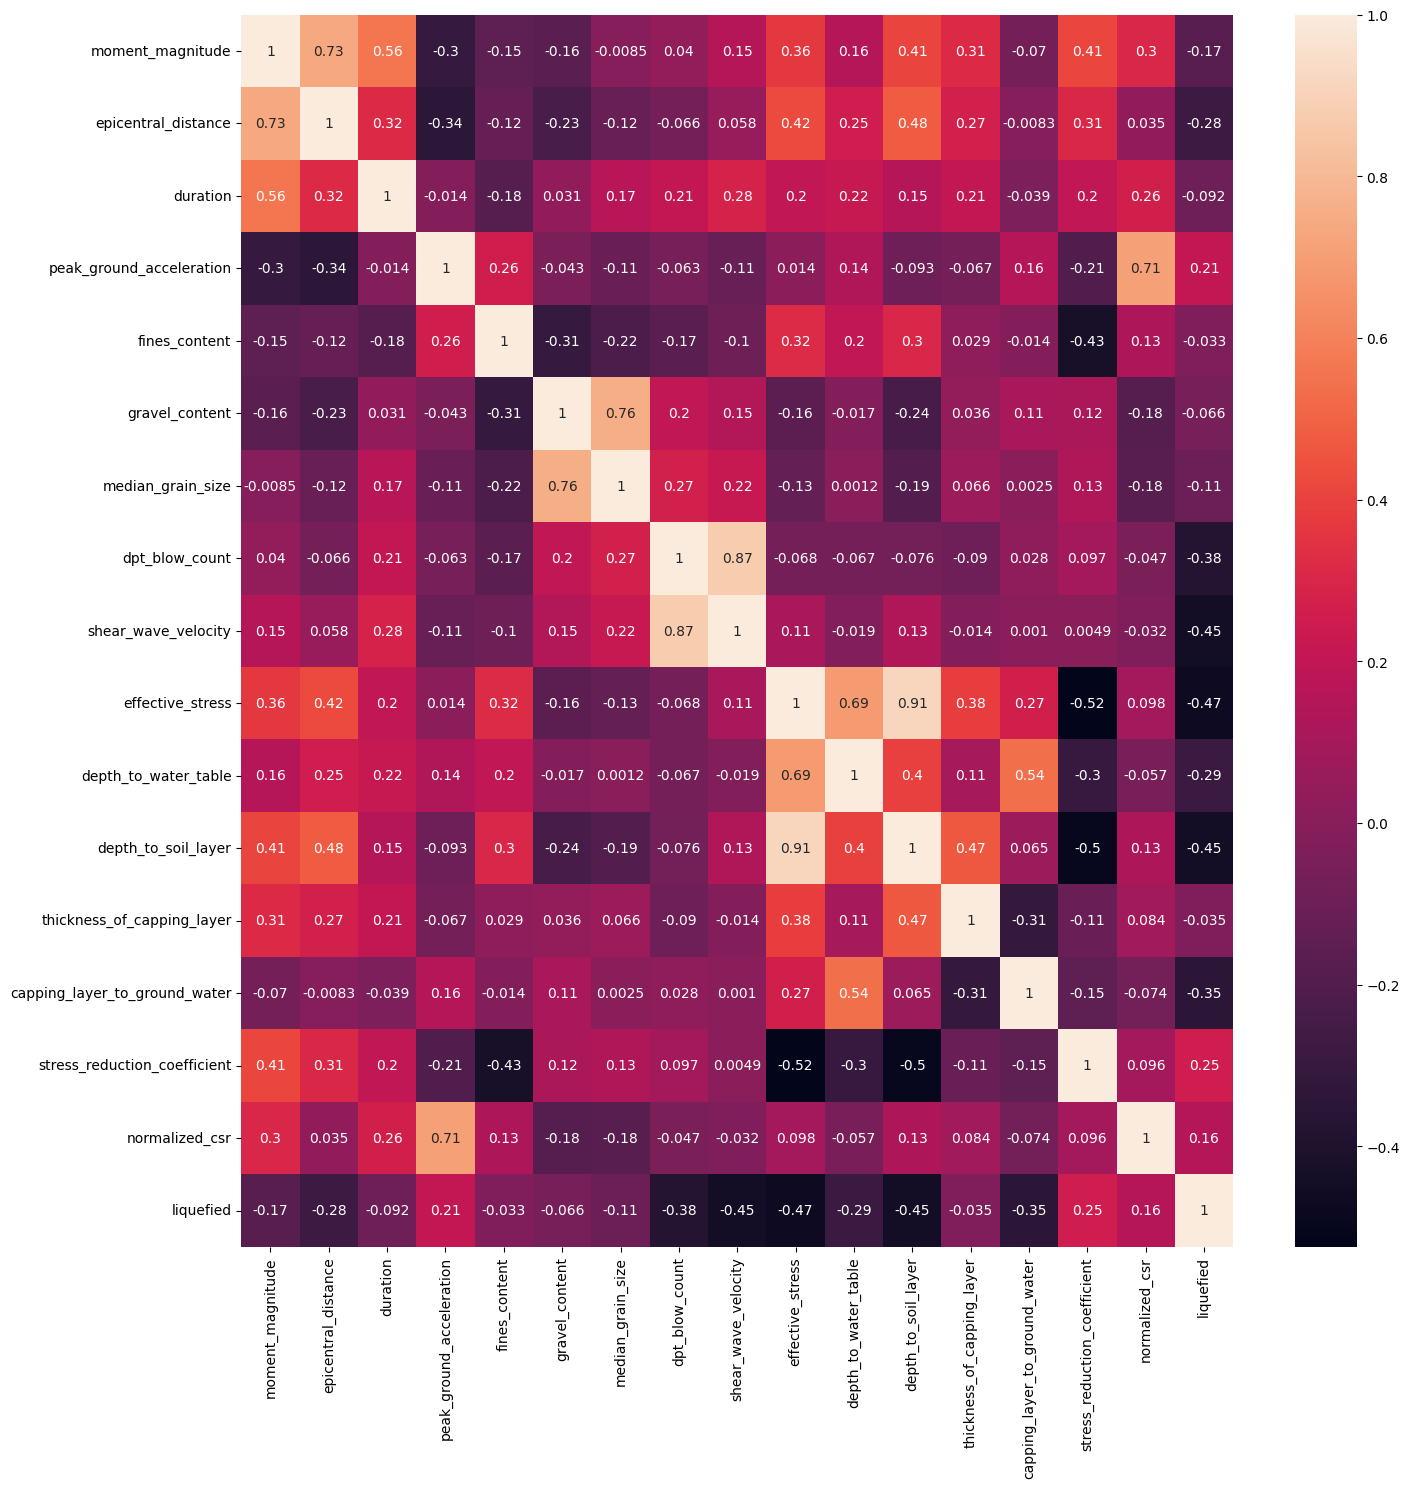

In [ ]:
import seaborn as sns

correlation_matrix = soil_df.corr()

plt.figure(figsize = (16, 16))
sns.heatmap(correlation_matrix, annot = True)

In [ ]:
# keep one from highly correlated columns
# would be better to preform a "Principal Component Analysis" instead
# dimensionality reduction

soil_df.drop(
  columns = ['effective_stress', 'shear_wave_velocity'],
  inplace = True
)

display(soil_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   moment_magnitude               234 non-null    float64
 1   epicentral_distance            225 non-null    float64
 2   duration                       229 non-null    float64
 3   peak_ground_acceleration       234 non-null    float64
 4   fines_content                  195 non-null    float64
 5   gravel_content                 208 non-null    float64
 6   median_grain_size              209 non-null    float64
 7   dpt_blow_count                 234 non-null    float64
 8   depth_to_water_table           234 non-null    float64
 9   depth_to_soil_layer            234 non-null    float64
 10  thickness_of_capping_layer     156 non-null    float64
 11  capping_layer_to_ground_water  160 non-null    float64
 12  stress_reduction_coefficient   234 non-null    flo

None

### Imputation

In [ ]:
# columns with null values are:
# 1. epicentral_distance, duration -> high correlation with moment_magnitude
#    replace with the "median" of values with same "moment_magnitude"
# 2. fines_content, gravel_content, median_grain_size
#    replace with -1 to indicate missing value
# 3. thickness_of_capping_layer and capping_layer_to_ground_water
#    replace with 0


filtered_df = soil_df[['moment_magnitude', 'epicentral_distance', 'duration']]

# values with same moment_magnitude
medians = filtered_df.groupby('moment_magnitude').median()

display(medians)

# null indices
indices = filtered_df.index[filtered_df.isnull().any(axis = 1)]

for index in indices:
  median_moment_magnitude = soil_df.loc[index, 'moment_magnitude']
  median_row = medians.query(f'index == {median_moment_magnitude}')

  soil_df.loc[index, 'epicentral_distance'] = median_row.iloc[0, 0]
  soil_df.loc[index, 'duration'] = median_row.iloc[0, 1]

# replace missing fines_content, gravel_content and median_grain_size with -1
soil_df.fillna({
  'fines_content': -1,
  'gravel_content': -1,
  'median_grain_size': -1,
  'thickness_of_capping_layer': 0,
  'capping_layer_to_ground_water': 0
}, inplace = True)

display(soil_df.info())


,epicentral_distance,duration
moment_magnitude,,
6.4,22.000000,3.50
6.8,15.500000,10.00
6.9,14.200000,10.90
7.0,44.130000,19.76
7.4,20.080000,17.55
7.5,177.000000,39.00
7.6,19.820000,41.00
7.7,84.300000,25.60
7.8,140.000000,34.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   moment_magnitude               234 non-null    float64
 1   epicentral_distance            234 non-null    float64
 2   duration                       234 non-null    float64
 3   peak_ground_acceleration       234 non-null    float64
 4   fines_content                  234 non-null    float64
 5   gravel_content                 234 non-null    float64
 6   median_grain_size              234 non-null    float64
 7   dpt_blow_count                 234 non-null    float64
 8   depth_to_water_table           234 non-null    float64
 9   depth_to_soil_layer            234 non-null    float64
 10  thickness_of_capping_layer     234 non-null    float64
 11  capping_layer_to_ground_water  234 non-null    float64
 12  stress_reduction_coefficient   234 non-null    flo

None

### Features & Target

In [ ]:

column_names = soil_df.columns

# in binary classification the "target" should be "binary"
# in our case it is "Yes" or "No"
target = 'liquefied'
features = column_names[column_names != target]

X = soil_df[features] # feature vectors
y = soil_df[target] # target

### Train-Test Split

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

# 20% of the data to be used for testing
# stratify = ...
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size = 0.2,
  stratify = y # IMPORTANT: BOTH CASES (True, False) SHOULD BE INCLUDED
)

print(f"Training Set: {len(y_train)}/{len(soil_df)}")
display(y_train)

print(f"Testing Set: {len(y_test)}/{len(soil_df)}")
display(y_test)

Training Set: 187/234


,liquefied
3,True
33,False
117,True
202,True
55,True
...,...
1,True
0,True
32,False
188,True


Testing Set: 47/234


,liquefied
44,True
91,False
121,False
195,True
34,False
84,True
56,True
112,True
50,False
172,True


### Training the Model

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# to improve numeric stability -> reduce all columns to mean of 0 and variance of 1
pipe = make_pipeline(StandardScaler(), LogisticRegression()).fit(X_train, y_train)

### Testing the Model

In [ ]:
score = pipe.score(X_test, y_test)

print(f'Mean Accuracy (Average of predicted == actual) = {score:.3f}')


Mean Accuracy (Average of predicted == actual) = 0.830


In [ ]:
# using metrics from sklearn
from sklearn.metrics import brier_score_loss, log_loss, zero_one_loss

predicted_liquefied = pipe.predict(X_test)

bscore = brier_score_loss(y_test, predicted_liquefied)
logloss = log_loss(y_test, predicted_liquefied)
zeroneloss = zero_one_loss(y_test, predicted_liquefied)

print(f'Brier Score: {bscore:.2f}, Log Loss: {logloss:.2f}, 0-1 Loss: {zeroneloss:.2f}')

Brier Score: 0.17, Log Loss: 6.14, 0-1 Loss: 0.17


In [ ]:
real_data = y_test
predicted_data = predicted_liquefied


number_of_mismatches = (real_data != predicted_data).sum()

# Test the mean accuracy
mean_accuracy = 1 - number_of_mismatches / len(y_test)

print(f"The number of missed predictions = {number_of_mismatches}")
print(f"Mean Accuracy = {score:.2f} | Computed = {mean_accuracy:.2f}")

The number of missed predictions = 8
Mean Accuracy = 0.83 | Computed = 0.83


In [ ]:
# predicting probabilities

test_row = X_test[:1]

predicted_probabilities = pipe.predict_proba(test_row)

display(predicted_probabilities)
display(predicted_data[:1])

display(y_test[:1])

array([[0.06729094, 0.93270906]])

array([ True])

,liquefied
44,True
